In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## 1. Collecting the data

In [4]:
titanic_data=pd.read_csv("https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.shape

(891, 12)

In [10]:
## 2. Analyzing the data

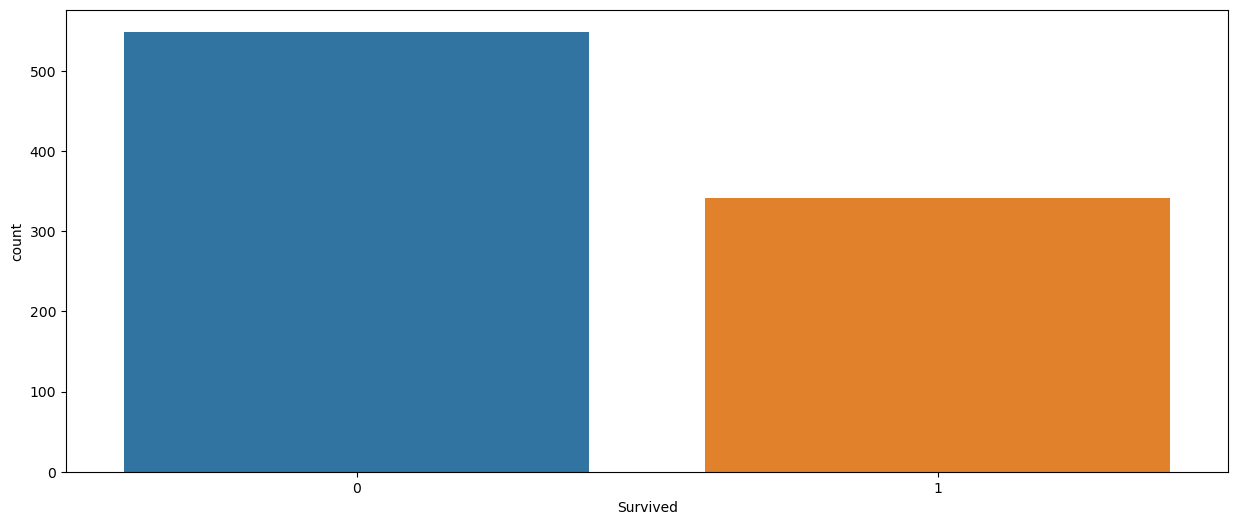

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='Survived', data = titanic_data)
plt.show()

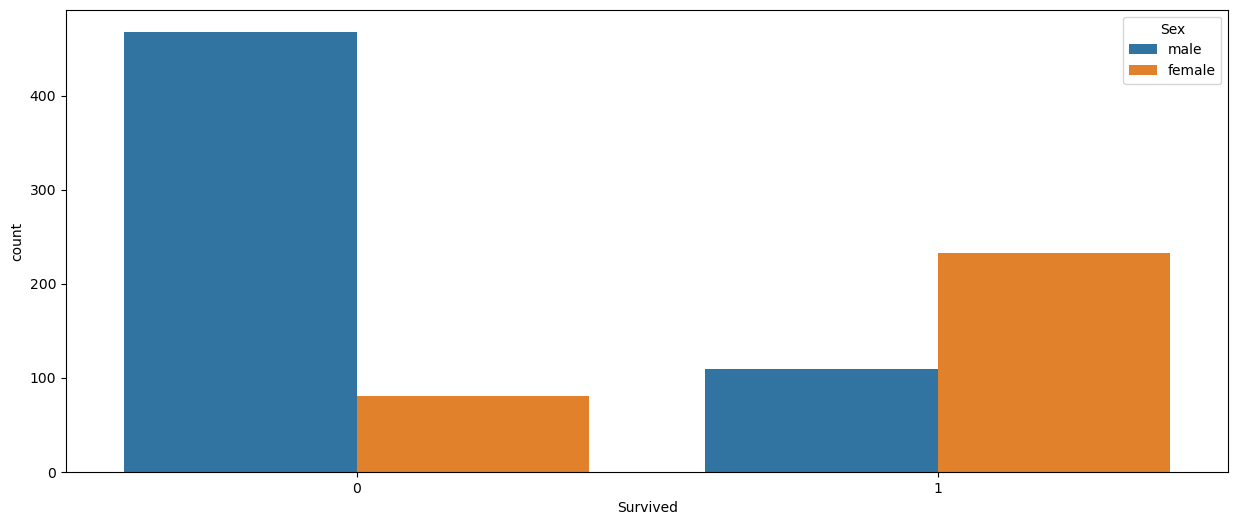

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='Survived', hue='Sex', data = titanic_data)
plt.show()

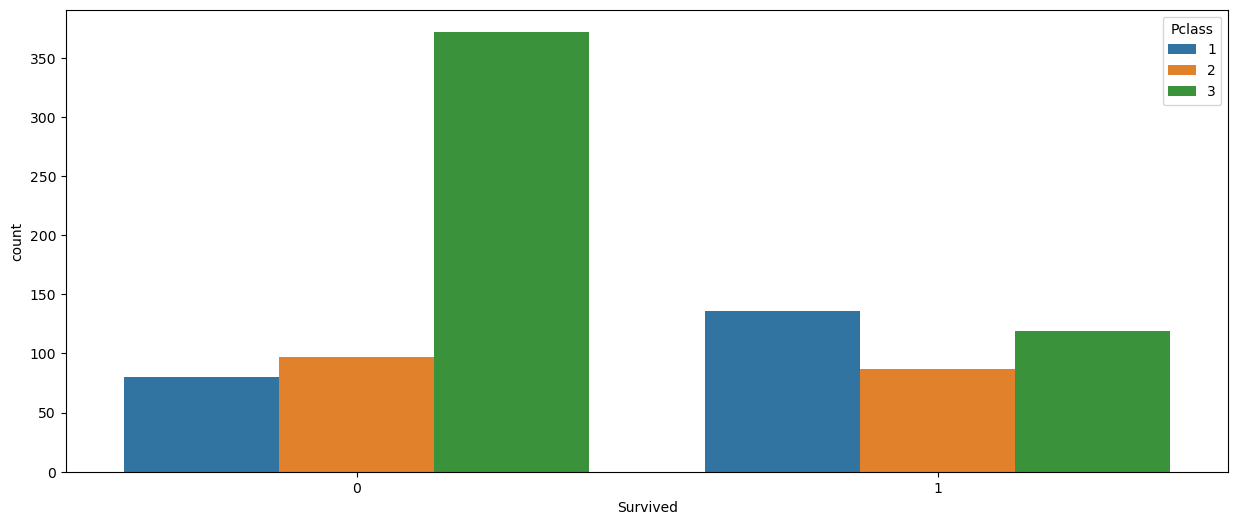

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x='Survived', hue='Pclass', data = titanic_data)
plt.show()

<Axes: ylabel='Frequency'>

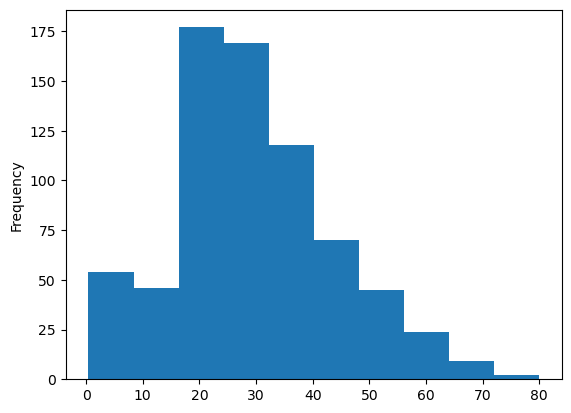

In [17]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

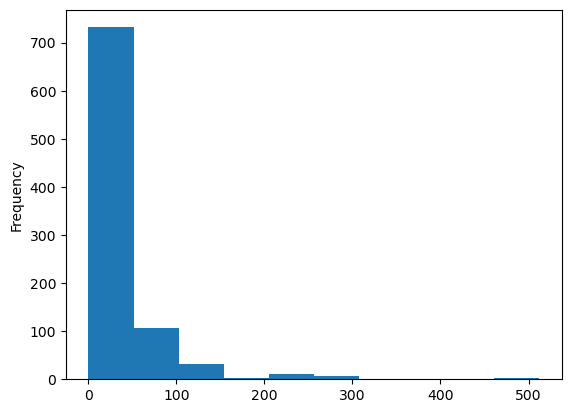

In [18]:
titanic_data["Fare"].plot.hist()

In [19]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


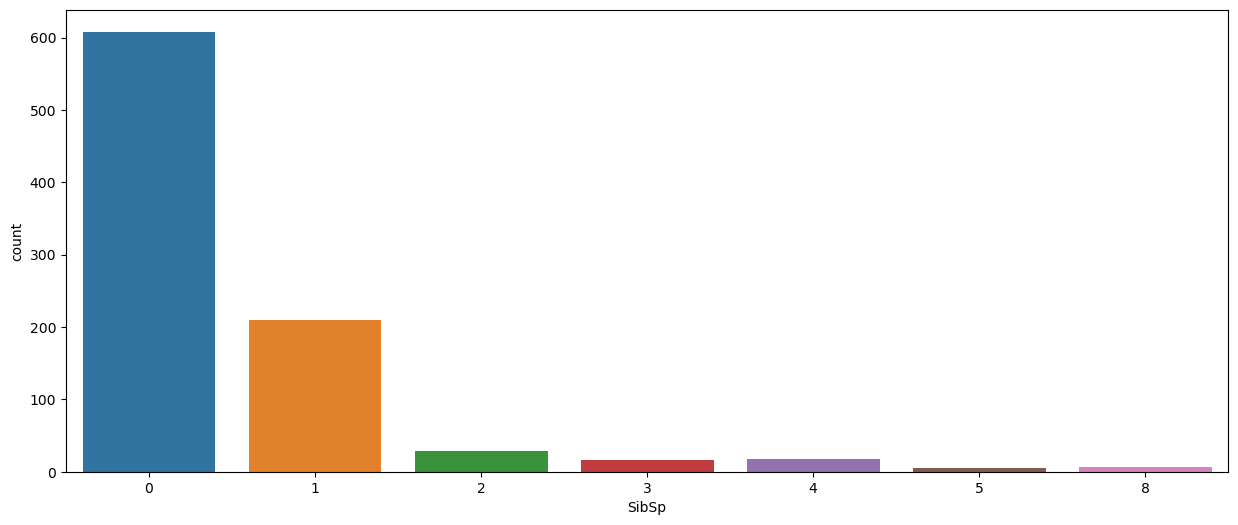

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x='SibSp', data = titanic_data)
plt.show()

In [22]:
## 3. Data Wrangling - Removing unwanted columns and missing value treatment

In [23]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

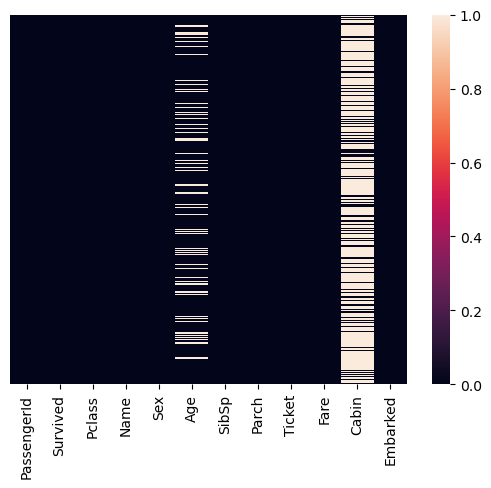

In [25]:
import seaborn as sns
sns.heatmap(titanic_data.isnull() , yticklabels = False)

<Axes: xlabel='Pclass', ylabel='Age'>

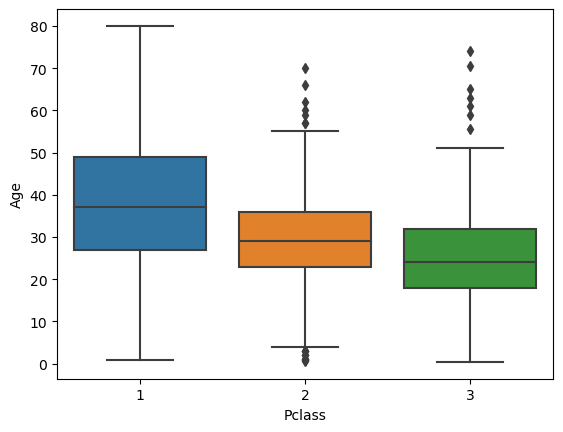

In [26]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [29]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
titanic_data.dropna(inplace=True)

In [31]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

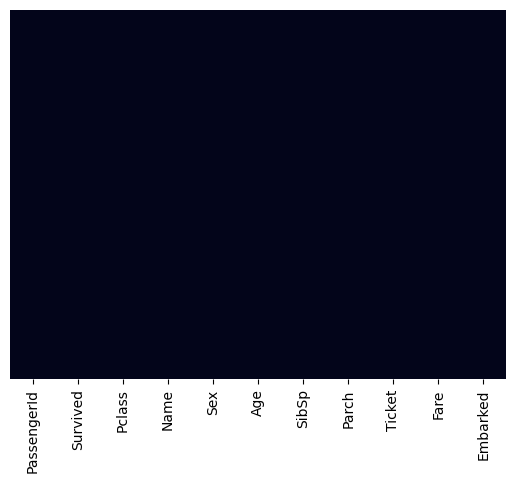

In [32]:
sns.heatmap(titanic_data.isnull() , yticklabels = False, cbar=False)

In [33]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [36]:
pd.get_dummies(titanic_data["Sex"]).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [38]:
sex=pd.get_dummies(titanic_data["Sex"], drop_first=True).astype(int)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [39]:
embark=pd.get_dummies(titanic_data["Embarked"], drop_first=True).astype(int)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [40]:
titanic_data['Embarked'].value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [41]:
pcl=pd.get_dummies(titanic_data["Pclass"], drop_first=True).astype(int)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [42]:
titanic_data = pd.concat([titanic_data,sex, embark,pcl],axis=1)

In [43]:
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0


In [44]:
titanic_data.drop(["PassengerId","Name","Sex","Ticket","Embarked","Pclass"], axis=1, inplace=True)

In [45]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [46]:
## 4. Training and testing the data

In [47]:
X=titanic_data.drop("Survived", axis=1)
y=titanic_data["Survived"]

In [48]:
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0,0,1
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()

In [62]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 699 to 51
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     498 non-null    float64
 1   SibSp   498 non-null    int64  
 2   Parch   498 non-null    int64  
 3   Fare    498 non-null    float64
 4   male    498 non-null    int32  
 5   Q       498 non-null    int32  
 6   S       498 non-null    int32  
 7   2       498 non-null    int32  
 8   3       498 non-null    int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 29.2 KB


In [60]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
predictions_train=logmodel.predict(X_train)

In [69]:
predictions_test=logmodel.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions_test)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_test)

0.7710280373831776

In [66]:
from sklearn.metrics import classification_report

In [73]:
report_test = classification_report(y_test, predictions_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [74]:
report_train = classification_report(y_train, predictions_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       298
           1       0.79      0.69      0.74       200

    accuracy                           0.80       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.80      0.80       498

